# **PyEnGNet 1.0**

## **Introducción**

Las redes genéticas se han convertido en una herramienta poderosa en el análisis integral de la expresión génica. Debido a la creciente cantidad de datos genéticos disponibles, los métodos computacionales para la generación de redes deben hacer frente a la llamada maldición de la dimensionalidad en la búsqueda de la fiabilidad de los resultados obtenidos. En este contexto, las técnicas de ensemble learning han mejorado significativamente la precisión de los resultados al combinar diferentes medidas, algoritmos o métodos. Por otro lado, las técnicas de optimización topológicas también son importantes en la reducción del tamaño de las redes, no sólo mejorando su arquitectura de red sino también manteniendo significancia biológica.

### Herramienta y procedimiento

EnGNet 1.0 es una aplicación informática que implementa una nueva metodología de explotación de datos de expresión genética denominada EnGNet. EnGNet es un nuevo algoritmo de dos pasos para la generación de redes de genes.

En primer lugar, el programa emplea una técnica de ensemble (“comité de máquinas”) para la generación de redes de co-expresión genética.

En segundo lugar, un algoritmo voraz optimiza tanto el tamaño como las características topológicas de la red. Este método no sólo es capaz de obtener redes fiables, sino que también mejora significativamente las características topológicas.

### El cambio

La herramienta EnGNet fue desarrollada originalmente en el lenguaje de programación Java, ahora queremos dar el paso a migrar la tecnología al popular lenguaje de programación python y aprovechar las bondades de ser un lenguaje ampliamente utilizado en la investigación, explotando el potencial de uso de EnGNet.

De esta manera nace: PyEnGNet

## **Funcionamiento del algoritmo**

PyEnGNet se ha desarrollado como una clase a la cual debemos asignarle únicamente:

- La matriz de datos a estudiar
- Los umbrales que deben superar los tests realizados por el algoritmo:
    - Coeficiente de correlación de Pearson
    - Coeficientes de rangos de Kendall
    - Coeficiente de correlación de Spearman
- Un umbral de peso de arista, que servirá para el último paso del algoritmo
    
El objetivo del desarrollo de PyEnGNet como un objeto es la encapsulación de todo el procedimiento para que el usuario solo deba acceder a las funciones de mayor relevancia

### **Instanciamiento del objeto PyEnGNet**

En primer lugar obtenemos a partir de un dataset de ejemplo un array de numpy que se pasará como parámetro al constructor de la clase.

In [1]:
import pandas as pd
import numpy as np
from pyEnGNet import *

df = pd.read_csv("Data/113_exp_mat_cond_1.csv")
df = pd.DataFrame(df)
df = df.drop(df.columns[[0,2]], axis=1)
data = df.to_numpy()

print("\n\t\t\t\t\t\t\tMATRIZ DE DATOS\n")
pd.DataFrame(data)


							MATRIZ DE DATOS



,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,0.393726,0.052912,0.079489,0.110079,0.076913,0.170031,0.076548,0.378425,0.069374,-0.024883,...,0.135870,0.555923,0.053774,0.063177,0.120053,0.511716,0.171683,0.181483,0.186592,0.166621
1,0.368257,0.192921,0.304331,0.347783,0.460730,0.247321,0.488002,0.395741,0.336612,0.395995,...,0.368265,0.436692,0.331386,0.396856,0.187229,0.297722,0.384049,0.422091,0.349731,0.260438
2,0.500661,0.480420,0.449263,0.462302,0.332204,0.347251,0.346586,0.356450,0.509264,0.486996,...,0.452821,0.340253,0.482209,0.524972,0.486942,0.474888,0.435856,0.357013,0.610022,0.443499
3,0.418802,0.333717,0.295416,0.313251,0.385264,0.350356,0.435079,0.418417,0.390439,0.357992,...,0.350447,0.329192,0.426531,0.389524,0.412562,0.483822,0.332376,0.317330,0.387120,0.373825
4,0.528209,0.466775,0.390307,0.547182,0.436885,0.585211,0.542756,0.565251,0.436395,0.460720,...,0.413356,0.582158,0.484834,0.523137,0.522180,0.286004,0.642618,0.526924,0.584369,0.533382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.518182,0.514139,0.538879,0.463914,0.420827,0.638548,0.450177,0.619931,0.414552,0.530368,...,0.545532,0.538625,0.435721,0.473603,0.701581,0.552184,0.544960,0.544448,0.543322,0.565474
109,0.679404,0.619771,0.718633,0.454273,0.554298,0.823445,0.462051,0.778620,0.607679,0.716958,...,0.637161,0.611109,0.622095,0.464864,0.763002,0.690760,0.697808,0.589683,0.568464,0.537067
110,0.716606,0.675982,0.752573,0.653249,0.656137,0.803875,0.610495,0.758321,0.646875,0.592495,...,0.782004,0.693562,0.580309,0.642324,0.659733,0.711134,0.755975,0.877445,0.751245,0.662435
111,0.659796,0.594530,0.635661,0.498229,0.605627,0.757235,0.567830,0.641744,0.538927,0.681520,...,0.606450,0.596641,0.561738,0.496406,0.738552,0.610183,0.640114,0.689054,0.546962,0.618393


Queremos dar un paso más y elaborar un diccionario de los genes de los cuales realizamos el estudio.

In [2]:
with open("Data/113_exp_mat_cond_1.csv") as f:
    l = f.readline()
    genes_dic = {}
    for i,l in enumerate(f):
        genes_dic[i] = l.split(",")[0]

De esta manera podemos visualizar lo siguiente:

In [3]:
for i in range(int(len(genes_dic)*0.1)):
    print(genes_dic[i],"\t-->\t", i)
print("\t...")    

ADR1 	-->	 0
FLO8 	-->	 1
GIS1 	-->	 2
IME4 	-->	 3
KAR4 	-->	 4
MSN1 	-->	 5
RIM101 	-->	 6
SDS3 	-->	 7
STE12 	-->	 8
SWI5 	-->	 9
TEC1 	-->	 10
	...


**Con todo esto, procedemos a instanciar un objeto PyEnGNet**

In [4]:
spearman = 0.7
kendall = 0.7
pearson = 0.7

peso_para_readicion_red = 0.7

peg = PyEnGNet(data, spearman_th=spearman, kendall_th=kendall, pearson_th=pearson, readded_th=peso_para_readicion_red)

### **Paso 1: Validar las correlaciones entre genes con una estrategia de major voting y obtención del grafo principal**

In [17]:
%%time
principal_edges = peg.mainmethod()
for e in principal_edges:
    e[0] = genes_dic[e[0]]
    e[1] = genes_dic[e[1]]
    
newhead = ["GenA", "GenB", "Weight"]
pd.DataFrame(principal_edges, columns=newhead).head()   # Mostrando sólo las 5 primeras aristas del grafo

CPU times: user 7.33 ms, sys: 47.6 ms, total: 54.9 ms
Wall time: 1.38 s


,GenA,GenB,Weight
0,ENT1,KTR1,{'weight': 0.7255571737129762}
1,STE2,AFR1,{'weight': 0.7155115996731671}
2,STE2,CHS1,{'weight': 0.7462321210562424}
3,PHO81,FUS3,{'weight': 0.7041228657045737}
4,PHO81,KAR5,{'weight': 0.7199583800134501}


**Visualización del grafo**

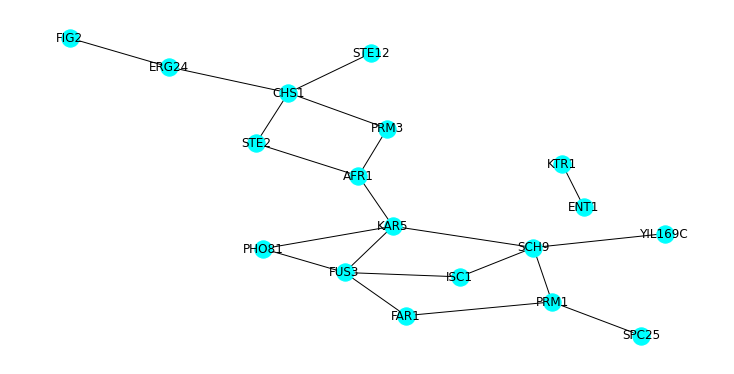

In [18]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(principal_edges)
options = {
    'node_color': 'cyan',
    'font_color': 'black',
    'with_labels': True
}
nx.draw_kamada_kawai(G,**options)

### **Paso 2: Obtención del bosque de recubrimiento máximo en la red**

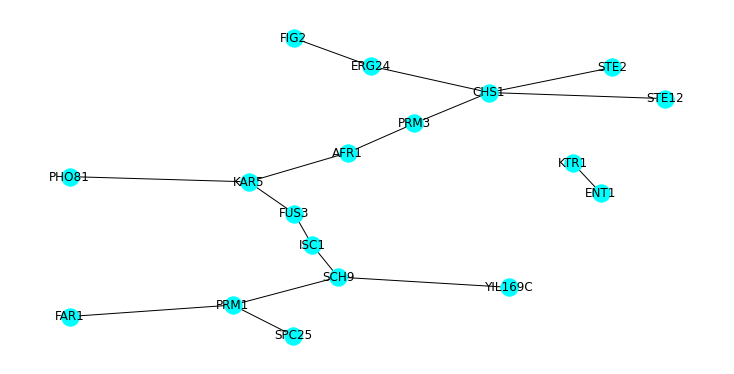

In [19]:
G2 = nx.maximum_spanning_tree(G, weight='weight', algorithm="kruskal")
nx.draw_kamada_kawai(G2, **options)

### **Paso 3: Volver a añadir edges con una relevancia significativa**

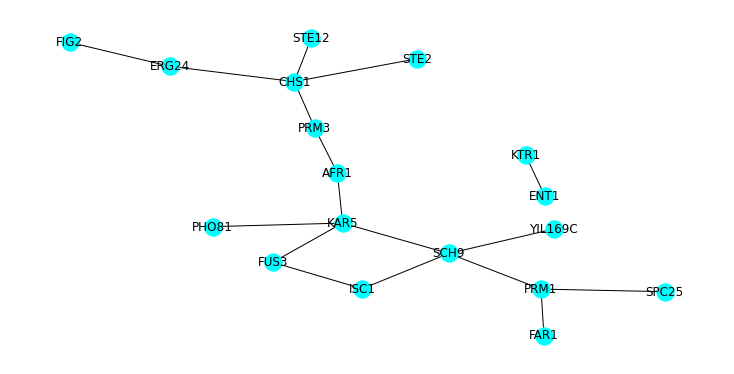

In [20]:
G3 = peg.readd_edges(G, G2)
nx.draw_kamada_kawai(G3, **options)

El peso o umbral que deben superar las aristas debe ser indicada por el usuario como se muestra en la instanciación del objeto

## **Performance de PyEnGNet**

In [21]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
matdim_time = [['100x100','500x500','1000x1000','2000x2000','5000x5000'],[0.8447303771972656, 22.814921855926514,132.30795669555664, 701.5740027427673,8086.798975467682]]
ncores_time = [['1','2','4','6','8'], [91.70972108840942,69.76191711425781,43.455793142318726,32.857638359069824,26.90361261367798]]

### **Tiempo de ejecución de PyEnGNet en función del número de núcleos utilizados en el cómputo**

Se tomó como entrada un conjunto de datos de 500 filas x 500 columnas.

In [22]:
df = pd.read_csv("t_num_cores_500x500.csv")
pd.DataFrame(df)

,numcores,tiempo en segundos
0,1,91.709721
1,2,69.761917
2,4,43.455793
3,6,32.857638
4,8,26.903613


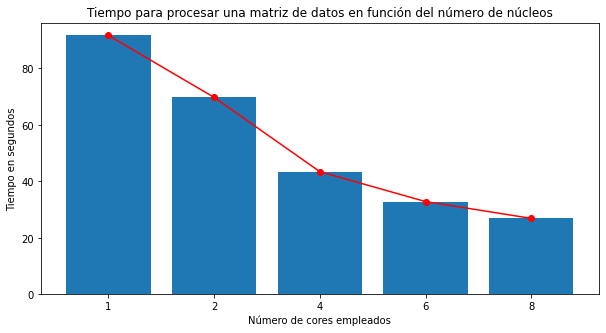

In [23]:
plt.bar(ncores_time[0],ncores_time[1])
plt.plot(ncores_time[0],ncores_time[1],marker='o', color='red')
plt.title("Tiempo para procesar una matriz de datos en función del número de núcleos")
plt.xlabel("Número de cores empleados")
plt.ylabel("Tiempo en segundos")
plt.show()

### **Tiempo de ejecución de PyEnGNet en función del tamaño de una matriz de datos cuadrada**

Se usaron 8 núcleos para calcular

In [24]:
df = pd.read_csv("t_num_fils.csv")
pd.DataFrame(df)

,dim_matriz,tiempo en segundos
0,100,0.844730
1,500,22.814922
2,1000,132.307957
3,2000,701.574003
4,5000,8086.798975


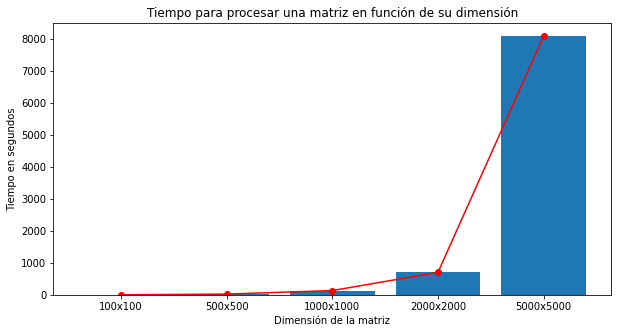

In [25]:
plt.bar(matdim_time[0],matdim_time[1])
plt.plot(matdim_time[0],matdim_time[1],marker='o', color='red')
plt.title("Tiempo para procesar una matriz en función de su dimensión")
plt.xlabel("Dimensión de la matriz")
plt.ylabel("Tiempo en segundos")
plt.show()